<a href="https://colab.research.google.com/github/thaisflopes/mestrado_PPGA_UnB/blob/main/AED_dados_consumidor_gov_vfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código do trabalho de mestrado da aluna Thaís Ferreira Lopes Oliveira no PPGA-UnB.

### Importando bibliotecas

In [ ]:
#Importando bibliotecas
import pandas as pd
pd.set_option('display.max_colwidth', None)  # Mostra o conteúdo completo das colunas
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

### Importando os dados do Consumidor.gov.br

In [ ]:
# Baixando as bases de dados do Consumidor.gov.br
dados2019 = pd.read_csv('dadosconsumidor2019.csv', delimiter=';', header=1)
dados2019.shape

(47528, 28)

In [ ]:
dados2020 = pd.read_csv('dadosconsumidor2020.csv', delimiter=';', header=1)
dados2020.shape

(66956, 28)

In [ ]:
dados2021 = pd.read_csv('dadosconsumidor2021.csv', delimiter=';', header=1)
dados2021.shape

(107609, 28)

In [ ]:
dados2022 = pd.read_csv('dadosconsumidor2022.csv', delimiter=';', header=1)
dados2022.shape

(114470, 28)

In [ ]:
dados2023 = pd.read_csv('dadosconsumidor2023.csv', delimiter=';', header=1)
dados2023.shape

(96204, 28)

In [ ]:
# Agrupando as bases de dados do Consumidor.gov.br
df = pd.concat([dados2019, dados2020, dados2021, dados2022, dados2023])

In [ ]:
# Visualizando a quantidade de linhas e colunas
df.shape

(432767, 28)

In [ ]:
# Visualizando os dados do Consumidor.gov.br
df.head()

,Gestor,Região,UF,Cidade,Ano Abertura,Mês Abertura,Data Abertura,Data e Hora Resposta,Data e Hora Análise,Data e Hora Recusa,...,Problema,Forma Contrato,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Edição de Conteúdo,Interação do Gestor,Código Classificador ANAC
0,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-07 15:31:48,NaN,NaN,...,Informações incompletas / inadequadas sobre o serviço,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,N,N,Z;Z;Z;Z;Z;1400
1,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-09 10:12:13,NaN,NaN,...,Atraso de voo,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,N,N,Z;Z;Z;Z;Z;3945/3910
2,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-10 09:05:01,NaN,NaN,...,Dificuldade para alterar ou cancelar o contrato /serviço,Internet,S,S,Finalizada avaliada,Resolvida,5.0,N,N,Z;Z;Z;Z;Z;0999/0710
3,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-02,2019-01-03 14:11:08,NaN,NaN,...,Cancelamento de voo,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,N,N,Z;Z;Z;Z;Z;3435
4,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-02,2019-01-03 19:23:55,NaN,NaN,...,Cobrança por serviço/produto não contratado / não reconhecido / não solicitado,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,N,N,Z;Z;Z;Z;Z;0935


In [ ]:
# Visualizando os tipos de dados do Consumidor.gov.br
df.dtypes

Gestor                             object
Região                             object
UF                                 object
Cidade                             object
Ano Abertura                        int64
Mês Abertura                        int64
Data Abertura                      object
Data e Hora Resposta               object
Data e Hora Análise                object
Data e Hora Recusa                 object
Data Finalização                   object
Prazo Resposta                     object
Prazo Análise Gestor (em dias)    float64
Tempo Resposta (em dias)          float64
Nome Fantasia                      object
Área                               object
Assunto                            object
Grupo Problema                     object
Problema                           object
Forma Contrato                     object
Procurou Empresa                   object
Respondida                         object
Situação                           object
Avaliação Reclamação              

### Preparação da base de dados para a pesquisa

#### Filtrando dados apenas das 6 empresas aéreas participantes da pesquisa

In [ ]:
# Obtendo valores únicos da coluna 'Nome Fantasia' (nomes das empresas aéreas)
empresas_aereas = df['Nome Fantasia'].unique()
empresas_aereas

array(['Latam Airlines (Tam)', 'Gol Linhas Aéreas', 'Azul Linhas Aéreas',
       'Avianca - Oceanair', 'Aeromexico', 'Air France',
       'Passaredo Linhas Aéreas', 'Air China', 'KLM',
       'Iberia Lineas Aereas', 'United Airlines', 'British Airways',
       'Copa Airlines', 'TACA Airlines', 'Delta Air Lines',
       'Avianca - Voos internacionais', 'Air Europa', 'Turkish Airlines',
       'Aerolíneas Argentinas', 'American Airlines', 'Alitalia',
       'TAP Air Portugal', 'TAAG - Linhas Aéreas de Angola',
       'Ethiopian Airlines', 'Emirates', 'Air Canada', 'Lufthansa',
       'MAP Linhas Aéreas', 'Aigle Azur', 'Cabo Verde Airlines',
       'Royal Air Maroc', 'EL AL', 'Sky Airline', 'Norwegian',
       'Qatar Airways', 'Boliviana de Aviación - BoA',
       'South African Airways', 'Swiss', 'Condor',
       'Two Flex Aviação Inteligente', 'Avior Airlines',
       'Virgin Atlantic Airways ', 'JetSMART Airlines - Chile',
       'Flybondi', 'Paranair', 'Amaszonas Línea Aérea', 'Edelwe

In [ ]:
# Definindo as 6 empresas aéreas participantes da pesquisa
empresas_participantes = ['Latam Airlines (Tam)',
                          'Gol Linhas Aéreas',
                          'Azul Linhas Aéreas',
                          'United Airlines',
                          'Copa Airlines',
                          'TAP Air Portugal']

In [ ]:
# Filtrando os dados de reclamações apenas das empresas aéreas participantes da pesquisa
df_filtrado_a = df[df['Nome Fantasia'].isin(empresas_participantes)].copy()
df_filtrado_a.shape

(370753, 28)

In [ ]:
# Dicionário de mapeamento para renomear as empresas
mapeamento_empresas = {
    'Latam Airlines (Tam)': 'Latam',
    'Gol Linhas Aéreas': 'Gol',
    'Azul Linhas Aéreas': 'Azul',
    'United Airlines': 'United',
    'Copa Airlines': 'Copa',
    'TAP Air Portugal': 'TAP'
}

In [ ]:
# Renomeando as empresas no DataFrame
df_filtrado_a.loc[:, 'empresa_aerea'] = df_filtrado_a['Nome Fantasia'].replace(mapeamento_empresas)

#### Filtrando dados apenas das Unidades Federativas participantes da pesquisa

In [ ]:
# Obtendo valores únicos da coluna 'UF'
ufs = df['UF'].unique()
ufs

array(['DF', 'GO', 'MS', 'MT', 'AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO',
       'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE', 'PR', 'RS',
       'SC', 'ES', 'MG', 'RJ', 'SP'], dtype=object)

In [ ]:
# Definindo as 16 UFs particpantes da pesquisa (AM, BA, CE, DF, ES, GO, MG, MS, MT, PE, PR, RJ, RO, SC, SP e TO)
ufs_participantes = ['AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MG', 'MS', 'MT', 'PE', 'PR', 'RJ', 'RO', 'SC', 'SP', 'TO']

In [ ]:
# Filtrando os dados de reclamações apenas das UFs participantes da pesquisa
df_filtrado_b = df_filtrado_a[df_filtrado_a['UF'].isin(ufs_participantes)].copy()
df_filtrado_b.shape

(316799, 29)

#### Reclassificando as categorias das reclamações

In [ ]:
# Definindo uma função para pegar apenas o código da coluna Códigos Classificadores ANAC
def obter_ultimo_termo(valor):
    return valor.split(';')[-1]

# Aplicando a função e criando a coluna codigo_anac
df_filtrado_b.loc[:, 'codigo_anac'] = df_filtrado_b['Código Classificador ANAC'].apply(obter_ultimo_termo)

# Transformando a coluna 'codigo_anac' em uma única string separada por vírgulas
df_filtrado_b.loc[:, 'codigo_anac'] = df_filtrado_b['codigo_anac'].apply(
    lambda x: ', '.join([codigo.strip() for codigo in x.split('/')]) if isinstance(x, str) and x else ''
)

# Exibindo o DataFrame
df_filtrado_b.head()

,Gestor,Região,UF,Cidade,Ano Abertura,Mês Abertura,Data Abertura,Data e Hora Resposta,Data e Hora Análise,Data e Hora Recusa,...,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Edição de Conteúdo,Interação do Gestor,Código Classificador ANAC,empresa_aerea,codigo_anac
0,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-07 15:31:48,NaN,NaN,...,S,S,Finalizada não avaliada,Não Avaliada,NaN,N,N,Z;Z;Z;Z;Z;1400,Latam,1400
1,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-09 10:12:13,NaN,NaN,...,S,S,Finalizada avaliada,Não Resolvida,1.0,N,N,Z;Z;Z;Z;Z;3945/3910,Gol,"3945, 3910"
2,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-10 09:05:01,NaN,NaN,...,S,S,Finalizada avaliada,Resolvida,5.0,N,N,Z;Z;Z;Z;Z;0999/0710,Latam,"0999, 0710"
3,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-02,2019-01-03 14:11:08,NaN,NaN,...,S,S,Finalizada não avaliada,Não Avaliada,NaN,N,N,Z;Z;Z;Z;Z;3435,Azul,3435
4,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-02,2019-01-03 19:23:55,NaN,NaN,...,S,S,Finalizada avaliada,Resolvida,5.0,N,N,Z;Z;Z;Z;Z;0935,Azul,0935


In [ ]:
# Criando a função para reclassificar os motivos das reclamações

def classificacao_codigo_anac(df, excel_file):
    # Ler a planilha do Excel que contém o mapeamento de códigos ANAC
    anac_mapping = pd.read_excel(excel_file)

    # Garantindo que a coluna 'codigo_anac' tenha zeros à esquerda para completar 4 dígitos
    anac_mapping['codigo_anac'] = anac_mapping['codigo_anac'].astype(str).str.zfill(4)

    # Criar listas para armazenar os códigos ANAC por categoria, convertendo cada item para object
    codigos_anac_problemas_operacionais = anac_mapping['codigo_anac'][anac_mapping['PROBLEMAS OPERACIONAIS'] == 1].map(str).tolist()
    codigos_anac_bagagem = anac_mapping['codigo_anac'][anac_mapping['BAGAGEM'] == 1].map(str).tolist()
    codigos_anac_contrato = anac_mapping['codigo_anac'][anac_mapping['CONTRATO'] == 1].map(str).tolist()
    codigos_anac_outros = anac_mapping['codigo_anac'][anac_mapping['OUTROS'] == 1].map(str).tolist()

    # Preencher valores nulos e garantir que os dados sejam strings
    df['codigo_anac'] = df['codigo_anac'].fillna('').astype(str)

    # Função para verificar se algum código da linha está presente nas listas
    def verificar_categoria(codigos, lista_codigos):
        # Dividir os códigos por vírgula e verificar se algum deles está na lista de códigos
        return any(codigo.strip() in lista_codigos for codigo in codigos.split(', '))

    # Adicionar novas colunas de motivos baseadas nos códigos ANAC
    df['obj_problemas_operacionais'] = df['codigo_anac'].apply(lambda x: verificar_categoria(x, codigos_anac_problemas_operacionais))
    df['obj_bagagem'] = df['codigo_anac'].apply(lambda x: verificar_categoria(x, codigos_anac_bagagem))
    df['obj_contrato'] = df['codigo_anac'].apply(lambda x: verificar_categoria(x, codigos_anac_contrato))
    df['obj_outros'] = df['codigo_anac'].apply(lambda x: verificar_categoria(x, codigos_anac_outros))

    return df

In [ ]:
# Caminho para o arquivo Excel
excel_file = 'reclassificacao_codigo_anac.xlsx'

# Chamada da função
dados_reclamacoes = classificacao_codigo_anac(df_filtrado_b, excel_file)

# Visualização do DataFrame resultante
dados_reclamacoes

,Gestor,Região,UF,Cidade,Ano Abertura,Mês Abertura,Data Abertura,Data e Hora Resposta,Data e Hora Análise,Data e Hora Recusa,...,Nota do Consumidor,Edição de Conteúdo,Interação do Gestor,Código Classificador ANAC,empresa_aerea,codigo_anac,obj_problemas_operacionais,obj_bagagem,obj_contrato,obj_outros
0,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-07 15:31:48,NaN,NaN,...,NaN,N,N,Z;Z;Z;Z;Z;1400,Latam,1400,False,False,True,False
1,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-09 10:12:13,NaN,NaN,...,1.0,N,N,Z;Z;Z;Z;Z;3945/3910,Gol,"3945, 3910",True,False,False,False
2,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-01,2019-01-10 09:05:01,NaN,NaN,...,5.0,N,N,Z;Z;Z;Z;Z;0999/0710,Latam,"0999, 0710",False,False,True,False
3,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-02,2019-01-03 14:11:08,NaN,NaN,...,NaN,N,N,Z;Z;Z;Z;Z;3435,Azul,3435,True,False,False,False
4,Secretaria Nacional do Consumidor,CO,DF,Brasília,2019,1,2019-01-02,2019-01-03 19:23:55,NaN,NaN,...,5.0,N,N,Z;Z;Z;Z;Z;0935,Azul,0935,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96197,Fundação de Proteção e Defesa do Consumidor,SE,SP,Votuporanga,2023,4,2023-04-05,2023-04-14 09:59:02,NaN,NaN,...,NaN,N,N,S;P;W;N;N;8000,Latam,8000,False,False,True,False
96198,Fundação de Proteção e Defesa do Consumidor,SE,SP,Votuporanga,2023,6,2023-06-09,2023-06-14 12:57:54,NaN,NaN,...,5.0,N,N,S;P;O;N;N;8000,Latam,8000,False,False,True,False
96199,Fundação de Proteção e Defesa do Consumidor,SE,SP,Votuporanga,2023,6,2023-06-27,2023-07-07 10:06:51,NaN,NaN,...,NaN,N,N,S;P;O;D;P;5300,Latam,5300,False,False,True,False
96201,Fundação de Proteção e Defesa do Consumidor,SE,SP,Votuporanga,2023,11,2023-11-13,2023-11-23 14:10:17,NaN,NaN,...,NaN,N,N,S;I;O;D;N;4599,Latam,4599,False,True,False,False


#### Excluindo colunas que não seram usadas

In [ ]:
# Excluindo as colunas que não serão usadas da base de dados de Reclamações
dados_reclamacoes_final = dados_reclamacoes.drop(['Cidade', 'Data Abertura', 'Data e Hora Resposta', 'Data e Hora Análise', 'Data e Hora Recusa', 'Data Finalização',
                                'Prazo Resposta', 'Prazo Análise Gestor (em dias)', 'Nome Fantasia', 'Área', 'Assunto', 'Grupo Problema', 'Problema',
                                'Edição de Conteúdo', 'Interação do Gestor', 'Código Classificador ANAC'], axis=1)

In [ ]:
# Baixando base ajustada
dados_reclamacoes_final.to_csv('base_reclamacoes_ajustada.csv', index=False)

### Análise Exploratória de Dados

In [ ]:
# Visualizando a quantidade de linhas e colunas
dados_reclamacoes_final.shape

(316799, 18)

In [ ]:
# Verificando os tipos de dados
print("\nTipos de Dados:")
dados_reclamacoes_final.dtypes


Tipos de Dados:


Gestor                         object
Região                         object
UF                             object
Ano Abertura                    int64
Mês Abertura                    int64
Tempo Resposta (em dias)      float64
Forma Contrato                 object
Procurou Empresa               object
Respondida                     object
Situação                       object
Avaliação Reclamação           object
Nota do Consumidor            float64
empresa_aerea                  object
codigo_anac                    object
obj_problemas_operacionais       bool
obj_bagagem                      bool
obj_contrato                     bool
obj_outros                       bool
dtype: object

In [ ]:
# Verificando a quantidade de valores ausentes por coluna
print("\nValores ausentes por coluna:")
dados_reclamacoes_final.isnull().sum()


Valores ausentes por coluna:


Gestor                             0
Região                             0
UF                                 0
Ano Abertura                       0
Mês Abertura                       0
Tempo Resposta (em dias)         212
Forma Contrato                     0
Procurou Empresa                   0
Respondida                         0
Situação                           0
Avaliação Reclamação               2
Nota do Consumidor            130118
empresa_aerea                      0
codigo_anac                        0
obj_problemas_operacionais         0
obj_bagagem                        0
obj_contrato                       0
obj_outros                         0
dtype: int64

##### Descrição estatística das variáveis categóricas:

- Contagem (count): O número total de valores não nulos (não ausentes).
- Valores únicos (unique): O número de categorias ou valores distintos na coluna.
- Valor mais frequente (top): O valor mais comum ou mais frequente na coluna.
- Frequência do valor mais comum (freq): O número de vezes que o valor mais comum aparece.

In [ ]:
# Estatísticas descritivas para variáveis categóricas
print("\nEstatísticas Descritivas - Variáveis Categóricas:")
dados_reclamacoes_final.describe(include=['object'])


Estatísticas Descritivas - Variáveis Categóricas:


,Gestor,Região,UF,Forma Contrato,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,empresa_aerea,codigo_anac
count,316799,316799,316799,316799,316799,316799,316799,316797,316799,316799
unique,18,5,16,9,2,2,2,3,6,5470
top,Fundação de Proteção e Defesa do Consumidor,SE,SP,Internet,S,S,Finalizada avaliada,Não Avaliada,Latam,5300
freq,78827,164550,78929,274536,292622,316587,186673,130126,130825,30692


##### Descrição estatística das variáveis numéricas:

- count: O número total de valores não nulos (não ausentes).
- mean: A média dos valores.
- std: O desvio padrão, que indica a dispersão dos dados em relação à média.
- min: O valor mínimo na coluna.
- 25%: O primeiro quartil (Q1), que é o valor abaixo do qual 25% dos dados se encontram.
- 50% (ou median): A mediana, ou o segundo quartil, que divide os dados ao meio.
- 75%: O terceiro quartil (Q3), que é o valor abaixo do qual 75% dos dados se encontram.
- max: O valor máximo na coluna.

In [ ]:
# Descrição estatística das variáveis numéricas
print("\nEstatísticas Descritivas - Variáveis Numéricas:")
dados_reclamacoes_final.describe()


Estatísticas Descritivas - Variáveis Numéricas:


,Ano Abertura,Mês Abertura,Tempo Resposta (em dias),Nota do Consumidor
count,316799.000000,316799.000000,316587.000000,186681.000000
mean,2021.376074,6.552407,4.905814,3.304236
std,1.249590,3.564130,3.269131,1.745658
min,2019.000000,1.000000,0.000000,1.000000
25%,2020.000000,3.000000,2.000000,1.000000
50%,2021.000000,7.000000,5.000000,4.000000
75%,2022.000000,10.000000,7.000000,5.000000
max,2023.000000,12.000000,16.000000,5.000000


### Gráficos

In [ ]:
# Calcular o total de reclamações
total_reclamacoes = len(dados_reclamacoes_final)

##### GESTOR

In [ ]:
# Contar as reclamações e calcular o percentual
reclamacoes_gestor_df = dados_reclamacoes_final['Gestor'].value_counts(normalize=False, sort=True).reset_index()

# Renomear as colunas
reclamacoes_gestor_df.columns = ['Gestor', 'Qtd de Reclamações']

# Calcular os percentuais diretamente
reclamacoes_gestor_df['Percentual (%)'] = (reclamacoes_gestor_df['Qtd de Reclamações'] / reclamacoes_gestor_df['Qtd de Reclamações'].sum()) * 100

# Exibir a tabela
reclamacoes_gestor_df

,Gestor,Qtd de Reclamações,Percentual (%)
0,Fundação de Proteção e Defesa do Consumidor,78827,24.882339
1,Secretaria Nacional do Consumidor,46333,14.625362
2,Programa Estadual de Proteção e Defesa do Consumidor,43980,13.882620
3,Departamento Estadual de Proteção e Defesa do Consumidor,26526,8.373132
4,Instituto Municipal de Proteção e Defesa do Consumidor,21387,6.750968
5,Secretaria de Estado da Justiça e Cidadania de Santa Catarina - Departamento de Defesa do Consumidor,18925,5.973819
6,Superintendência de Proteção e Defesa do Consumidor do Estado da Bahia,15886,5.014536
7,Programa Estadual de Proteção e Defesa do Consumidor - DECON/CE,12406,3.916048
8,Superintendência de Proteção e Defesa do Consumidor,11451,3.614595
9,Instituto Estadual de Proteção e Defesa do Consumidor,10891,3.437827


##### TEMPO RESPOSTA (em dias)

In [ ]:
# Contar as reclamações e calcular o percentual
tempo_resposta_df = dados_reclamacoes_final['Tempo Resposta (em dias)'].value_counts(normalize=False, sort=True).reset_index()

# Renomear as colunas
tempo_resposta_df.columns = ['Tempo Resposta (em dias)', 'Qtd de Reclamações']

# Calcular os percentuais diretamente
tempo_resposta_df['Percentual (%)'] = (tempo_resposta_df['Qtd de Reclamações'] / tempo_resposta_df['Qtd de Reclamações'].sum()) * 100

# Exibir a tabela
tempo_resposta_df

,Tempo Resposta (em dias),Qtd de Reclamações,Percentual (%)
0,1.0,55200,17.435965
1,2.0,35903,11.340643
2,3.0,32423,10.241419
3,7.0,29758,9.399628
4,8.0,28530,9.011741
5,4.0,26907,8.499086
6,6.0,26861,8.484556
7,5.0,23952,7.565693
8,10.0,21073,6.656306
9,9.0,18280,5.774084


##### FORMA CONTRATO

In [ ]:
# Contar as reclamações e calcular o percentual
forma_contrato_df = dados_reclamacoes_final['Forma Contrato'].value_counts(normalize=False, sort=True).reset_index()

# Renomear as colunas
forma_contrato_df.columns = ['Forma Contrato', 'Qtd de Reclamações']

# Calcular os percentuais diretamente
forma_contrato_df['Percentual (%)'] = (forma_contrato_df['Qtd de Reclamações'] / forma_contrato_df['Qtd de Reclamações'].sum()) * 100

# Exibir a tabela
forma_contrato_df

,Forma Contrato,Qtd de Reclamações,Percentual (%)
0,Internet,274536,86.659364
1,Telefone,16643,5.253489
2,Loja física,11440,3.611123
3,Não comprei / contratei,10915,3.445402
4,Ganhei de presente,1576,0.497476
5,Domicílio,686,0.216541
6,Catálogo,432,0.136364
7,SMS / Mensagem de texto,300,0.094697
8,"Stand, feiras e eventos",271,0.085543


##### PROCUROU EMPRESA

In [ ]:
# Contar as reclamações e calcular o percentual
reclamacoes_procurou_empresa_df = dados_reclamacoes_final['Procurou Empresa'].value_counts(normalize=False, sort=True).reset_index()

# Renomear as colunas
reclamacoes_procurou_empresa_df.columns = ['Procurou Empresa', 'Qtd de Reclamações']

# Calcular os percentuais diretamente
reclamacoes_procurou_empresa_df['Percentual (%)'] = (reclamacoes_procurou_empresa_df['Qtd de Reclamações'] / reclamacoes_procurou_empresa_df['Qtd de Reclamações'].sum()) * 100

# Exibir a tabela
reclamacoes_procurou_empresa_df


,Procurou Empresa,Qtd de Reclamações,Percentual (%)
0,S,292622,92.368347
1,N,24177,7.631653


##### RESPONDIDA

In [ ]:
# Contar as reclamações e calcular o percentual de cada categoria
reclamacoes_respondida_df = dados_reclamacoes_final['Respondida'].value_counts(normalize=False, sort=True).reset_index()

# Renomear as colunas
reclamacoes_respondida_df.columns = ['Respondida', 'Qtd de Reclamações']

# Calcular os percentuais diretamente
reclamacoes_respondida_df['Percentual (%)'] = (reclamacoes_respondida_df['Qtd de Reclamações'] / reclamacoes_respondida_df['Qtd de Reclamações'].sum()) * 100

# Exibir a tabela
reclamacoes_respondida_df

,Respondida,Qtd de Reclamações,Percentual (%)
0,S,316587,99.933081
1,N,212,0.066919


##### SITUAÇÃO

In [ ]:
# Contar as reclamações e calcular o percentual
reclamacoes_situacao_df = dados_reclamacoes_final['Situação'].value_counts(normalize=False, sort=True).reset_index()

# Renomear as colunas
reclamacoes_situacao_df.columns = ['Situação', 'Qtd de Reclamações']

# Calcular os percentuais diretamente
reclamacoes_situacao_df['Percentual (%)'] = (reclamacoes_situacao_df['Qtd de Reclamações'] / reclamacoes_situacao_df['Qtd de Reclamações'].sum()) * 100

# Exibir a tabela
reclamacoes_situacao_df

,Situação,Qtd de Reclamações,Percentual (%)
0,Finalizada avaliada,186673,58.924744
1,Finalizada não avaliada,130126,41.075256


##### AVALIAÇÃO RECLAMAÇÃO

In [ ]:
# Contar as reclamações e calcular o percentual
avaliacao_reclamacao_df = dados_reclamacoes_final['Avaliação Reclamação'].value_counts(normalize=False, sort=True).reset_index()

# Renomear as colunas
avaliacao_reclamacao_df.columns = ['Avaliação Reclamação', 'Qtd de Reclamações']

# Calcular os percentuais diretamente
avaliacao_reclamacao_df['Percentual (%)'] = (avaliacao_reclamacao_df['Qtd de Reclamações'] / avaliacao_reclamacao_df['Qtd de Reclamações'].sum()) * 100

# Exibir a tabela
avaliacao_reclamacao_df

,Avaliação Reclamação,Qtd de Reclamações,Percentual (%)
0,Não Avaliada,130126,41.075515
1,Resolvida,120373,37.996888
2,Não Resolvida,66298,20.927597


##### NOTA DO CONSUMIDOR

In [ ]:
# Contar as reclamações e calcular o percentual
nota_consumidor_df = dados_reclamacoes_final['Nota do Consumidor'].value_counts(normalize=False, sort=True).reset_index()

# Renomear as colunas
nota_consumidor_df.columns = ['Nota do Consumidor', 'Qtd de Reclamações']

# Calcular os percentuais diretamente
nota_consumidor_df['Percentual (%)'] = (nota_consumidor_df['Qtd de Reclamações'] / nota_consumidor_df['Qtd de Reclamações'].sum()) * 100

# Exibir a tabela
nota_consumidor_df

,Nota do Consumidor,Qtd de Reclamações,Percentual (%)
0,5.0,79941,42.822248
1,1.0,58715,31.452049
2,4.0,22936,12.286199
3,3.0,16496,8.836464
4,2.0,8593,4.603039


##### ANO E MÊS ABERTURA

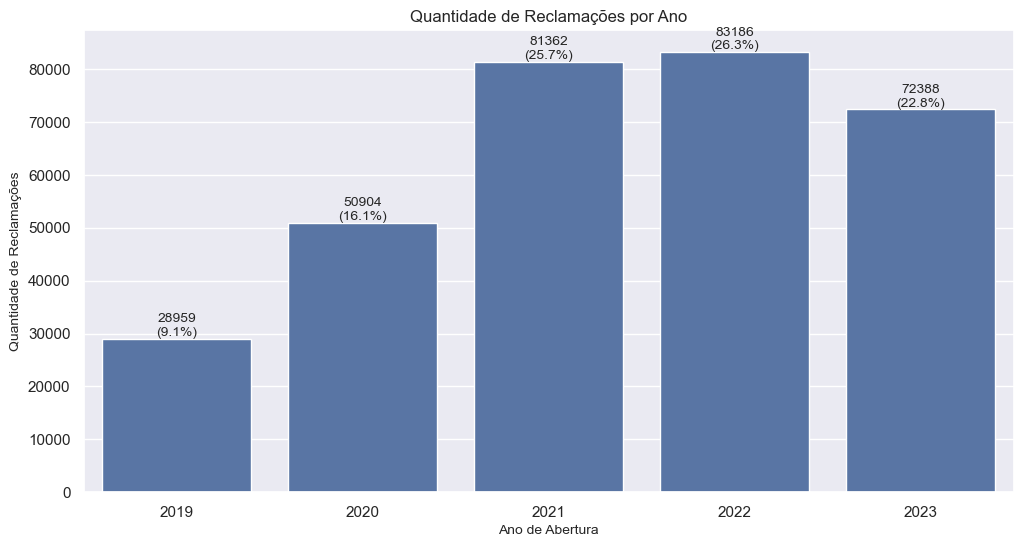

In [ ]:
# Contar as reclamacoes de cada ano
reclamacoes_ano = dados_reclamacoes_final.groupby(['Ano Abertura']).size().reset_index(name='Quantidade')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=dados_reclamacoes_final, x='Ano Abertura')

# Título e rótulos dos eixos
plt.title('Quantidade de Reclamações por Ano', fontsize=12)
plt.xlabel('Ano de Abertura', fontsize=10)
plt.ylabel('Quantidade de Reclamações', fontsize=10)

# Adicionando os números e percentuais em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_reclamacoes) * 100
    ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Salvar a figura em um arquivo
plt.savefig("qtd_reclamacoes_por_ano_com_percentual.png", format="png", dpi=300)

# Exibir o gráfico
plt.show()

In [ ]:
# Calcular o crescimento ano a ano
reclamacoes_ano['Crescimento Anual (%)'] = reclamacoes_ano['Quantidade'].pct_change() * 100

# Exibindo o resultado
print("\nCrescimento Percentual Ano a Ano:")
print(reclamacoes_ano)


Crescimento Percentual Ano a Ano:
   Ano Abertura  Quantidade  Crescimento Anual (%)
0          2019       28959                    NaN
1          2020       50904              75.779550
2          2021       81362              59.834198
3          2022       83186               2.241833
4          2023       72388             -12.980550


In [ ]:
# Contar as reclamações por ano e mês
reclamacoes_ano_mes = dados_reclamacoes_final.groupby(['Mês Abertura', 'Ano Abertura']).size().unstack(fill_value=0)

# Calcular o total de reclamações por mês
reclamacoes_ano_mes['Total'] = reclamacoes_ano_mes.sum(axis=1)

# Calcular o percentual do total para cada mês
reclamacoes_ano_mes['Percentual do Total'] = (reclamacoes_ano_mes['Total'] / total_reclamacoes) * 100

# Exibir a tabela
reclamacoes_ano_mes

Ano Abertura,2019,2020,2021,2022,2023,Total,Percentual do Total
Mês Abertura,,,,,,,
1,2003,2969,6403,12304,6422,30101,9.501608
2,1793,2415,5696,8510,5154,23568,7.439417
3,1882,9618,6977,8707,5875,33059,10.435323
4,2135,4077,5083,6471,5334,23100,7.291690
5,2084,3336,5151,6081,5568,22220,7.013911
6,2413,3217,5209,6281,5537,22657,7.151853
7,2791,3228,5512,6079,5729,23339,7.367132
8,2352,2987,5894,6783,6518,24534,7.744343
9,2478,4043,7905,5597,6296,26319,8.307791


##### REGIÃO E UF

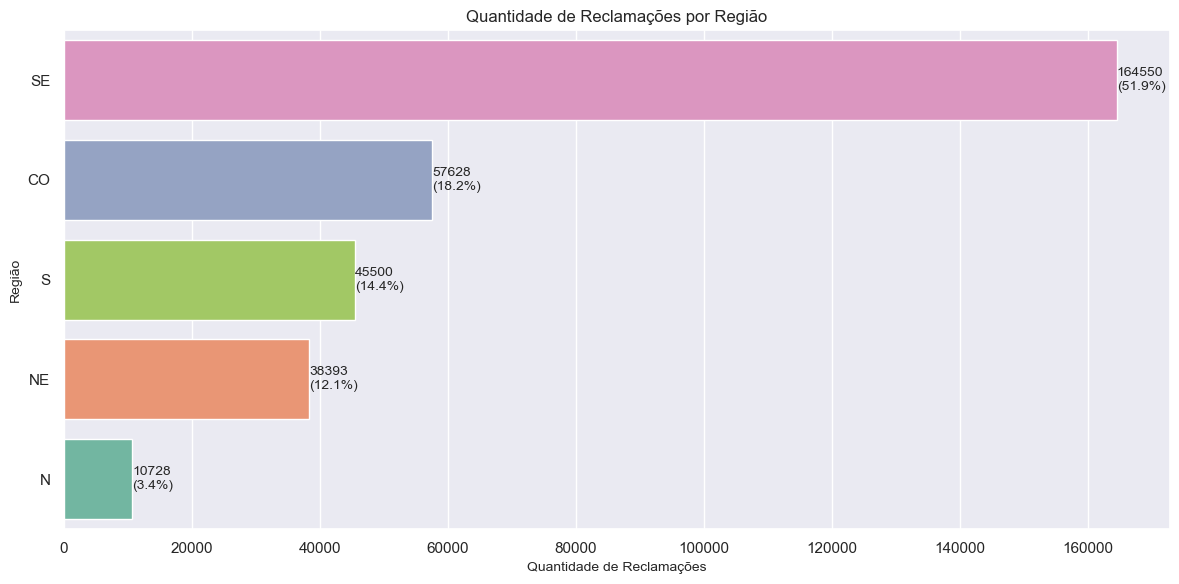

In [ ]:
# Contar as reclamações de cada região
reclamacoes_regiao = dados_reclamacoes_final['Região'].value_counts()

# Definindo o dicionário de cores para as regiões
cores_regioes = {
    'N': '#66C2A5',
    'NE': '#FC8D62',
    'CO': '#8DA0CB',
    'SE': '#E78AC3',
    'S': '#A6D854'
}

# Criar o gráfico de barras horizontais, ordenando pelas regiões com mais reclamações
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=dados_reclamacoes_final, y='Região', hue='Região',
                   order=reclamacoes_regiao.index, palette=cores_regioes)

# Título e rótulos dos eixos
plt.title('Quantidade de Reclamações por Região', fontsize=12)
plt.ylabel('Região', fontsize=10)
plt.xlabel('Quantidade de Reclamações', fontsize=10)

# Adicionando os números e percentuais ao lado de cada barra
for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_reclamacoes) * 100
    ax.annotate(f'{int(width)}\n({percentage:.1f}%)',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10)

# Ajustando o layout para o gráfico
plt.tight_layout()

# Salvar a figura em um arquivo
plt.savefig("qtd_reclamacoes_por_regiao_com_percentual.png", format="png", dpi=300)

# Exibir o gráfico
plt.show()

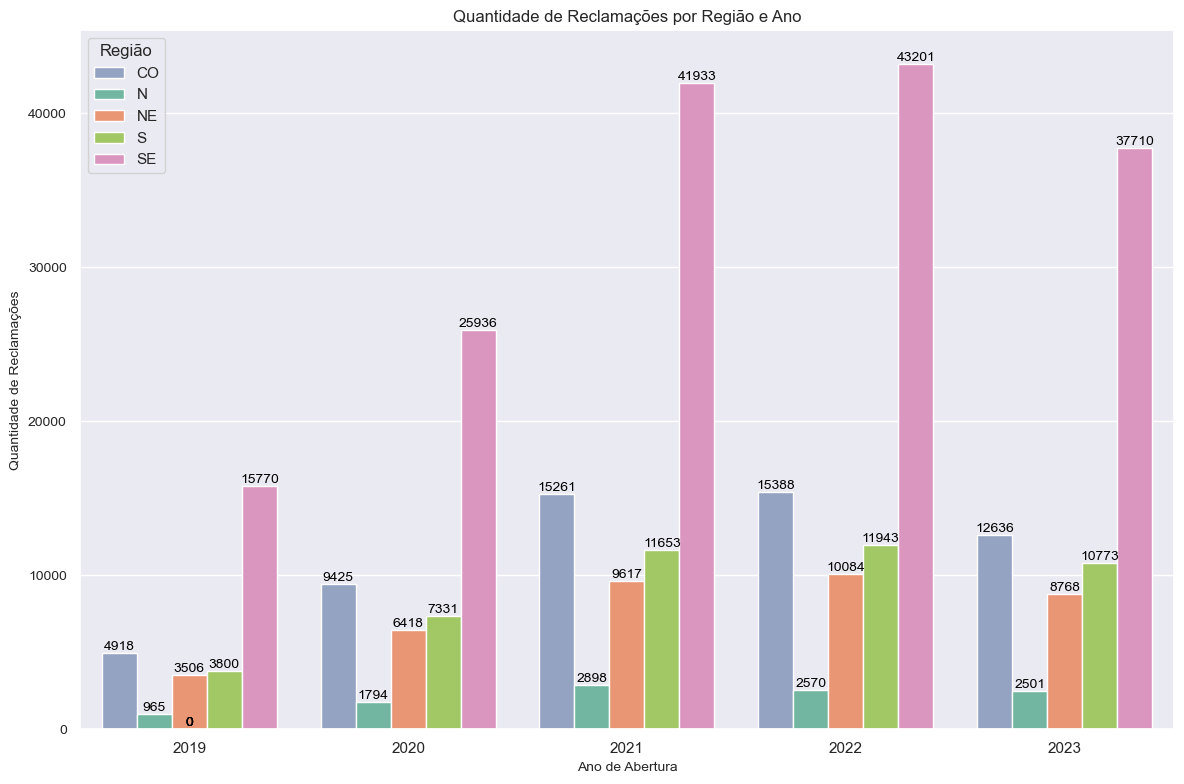

In [ ]:
# Agrupar as reclamacoes por Região e Ano de Abertura
reclamacoes_regiao_ano = dados_reclamacoes_final.groupby(['Região', 'Ano Abertura']).size().reset_index(name='Quantidade')

# Definindo o dicionário de cores para as regiões
cores_regioes = {
    'N': '#66C2A5',
    'NE': '#FC8D62',
    'CO': '#8DA0CB',
    'SE': '#E78AC3',
    'S': '#A6D854'
}

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Ano Abertura', y='Quantidade', hue='Região', data=reclamacoes_regiao_ano, palette=cores_regioes)

# Título e rótulos dos eixos
plt.title('Quantidade de Reclamações por Região e Ano', fontsize=12)
plt.xlabel('Ano de Abertura', fontsize=10)
plt.ylabel('Quantidade de Reclamações', fontsize=10)

# Adicionando os números e percentuais em cima de cada barra
for p in ax.patches:
    # Pega a altura da barra para posicionar o rótulo
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2  # Centraliza o texto na largura da barra
    y_position = height  # Posiciona o texto no topo da barra

    # Formatação do texto: quantidade de reclamações
    value_text = f'{height:.0f}'

    # Adiciona o rótulo com o número de reclamações na parte superior da barra
    ax.annotate(value_text,
                (x_position, y_position),
                ha='center', va='bottom',  # Alinha o texto no topo da barra
                fontsize=10, color='black')

# Ajustar o tamanho da fonte das categorias
plt.yticks(fontsize=10)

# Ajustar layout
plt.tight_layout()

# Salvar a figura em um arquivo
plt.savefig("qtd_reclamacoes_por_regiao_ano.png", format="png", dpi=300)

# Exibir o gráfico
plt.show()

In [ ]:
# Calcular o crescimento ano a ano por região
reclamacoes_regiao_ano['Crescimento Anual (%)'] = reclamacoes_regiao_ano.groupby('Região')['Quantidade'].pct_change() * 100

# Exibindo o resultado
print("\nCrescimento Percentual por Região e Ano:")
print(reclamacoes_regiao_ano)


Crescimento Percentual por Região e Ano:
   Região  Ano Abertura  Quantidade  Crescimento Anual (%)
0      CO          2019        4918                    NaN
1      CO          2020        9425              91.642944
2      CO          2021       15261              61.920424
3      CO          2022       15388               0.832187
4      CO          2023       12636             -17.884066
5       N          2019         965                    NaN
6       N          2020        1794              85.906736
7       N          2021        2898              61.538462
8       N          2022        2570             -11.318150
9       N          2023        2501              -2.684825
10     NE          2019        3506                    NaN
11     NE          2020        6418              83.057616
12     NE          2021        9617              49.844188
13     NE          2022       10084               4.855984
14     NE          2023        8768             -13.050377
15      S     

In [ ]:
# Contar as reclamações por Ano e UF
reclamacoes_ano_uf = dados_reclamacoes_final.groupby(['UF', 'Ano Abertura']).size().unstack(fill_value=0)

# Calcular o total de reclamações por UF
reclamacoes_ano_uf['Total'] = reclamacoes_ano_uf.sum(axis=1)

# Calcular o percentual do total para cada UF
reclamacoes_ano_uf['Percentual do Total'] = (reclamacoes_ano_uf['Total'] / total_reclamacoes) * 100

# Ordenar as UF pelo total de reclamações (do maior para o menor)
reclamacoes_ano_uf = reclamacoes_ano_uf.sort_values(by='Total', ascending=False)

# Exibir a tabela
reclamacoes_ano_uf

Ano Abertura,2019,2020,2021,2022,2023,Total,Percentual do Total
UF,,,,,,,
SP,8593,12925,20091,20515,16805,78929,24.914536
MG,3395,6501,10851,12018,11229,43994,13.887039
DF,3178,5873,9371,9024,6874,34320,10.833368
RJ,2831,4845,8227,7878,6956,30737,9.702366
PR,2390,4394,6855,6803,6107,26549,8.380393
SC,1410,2937,4798,5140,4666,18951,5.982026
BA,1441,2489,4091,4280,3748,16049,5.065988
CE,1291,2161,2951,3281,2706,12390,3.910997
GO,894,1712,3002,3098,2750,11456,3.616173


##### EMPRESA AEREA

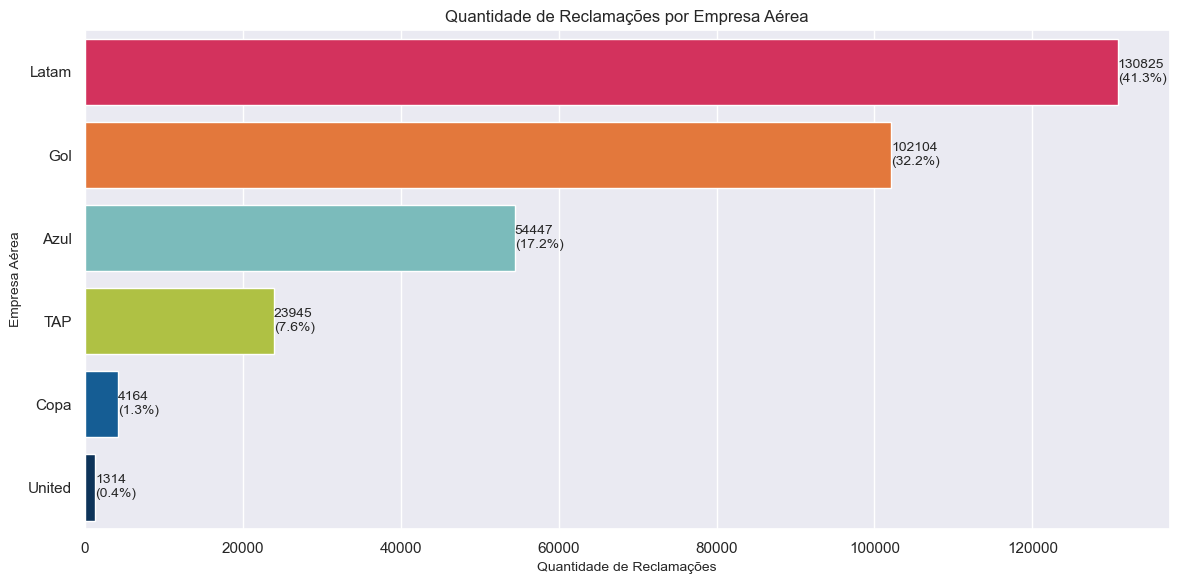

In [ ]:
# Contar as reclamações de cada empresa
reclamacoes_empresa = dados_reclamacoes_final['empresa_aerea'].value_counts()

# Definindo o dicionário de cores para as empresas
cores_empresas = {
    'Azul': '#70C6C6',
    'Copa': '#0060A9',
    'Gol': '#FF7020',
    'Latam': '#EE1750',
    'TAP': '#BED62F',
    'United': '#003366'
}

# Criar o gráfico de barras horizontais
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=dados_reclamacoes_final, y='empresa_aerea', hue='empresa_aerea',
                   order=reclamacoes_empresa.index, palette=cores_empresas)

# Título e rótulos dos eixos
plt.title('Quantidade de Reclamações por Empresa Aérea', fontsize=12)
plt.ylabel('Empresa Aérea', fontsize=10)
plt.xlabel('Quantidade de Reclamações', fontsize=10)

# Adicionando os números e percentuais ao lado de cada barra
for p in ax.patches:
    width = p.get_width()  # Agora é a largura, pois estamos usando barras horizontais
    percentage = (width / total_reclamacoes) * 100
    ax.annotate(f'{int(width)}\n({percentage:.1f}%)',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10)

# Ajustar o layout para o gráfico
plt.tight_layout()

# Salvar a figura em um arquivo
plt.savefig("qtd_reclamacoes_por_empresa_com_percentual.png", format="png", dpi=300)

# Exibir o gráfico
plt.show()

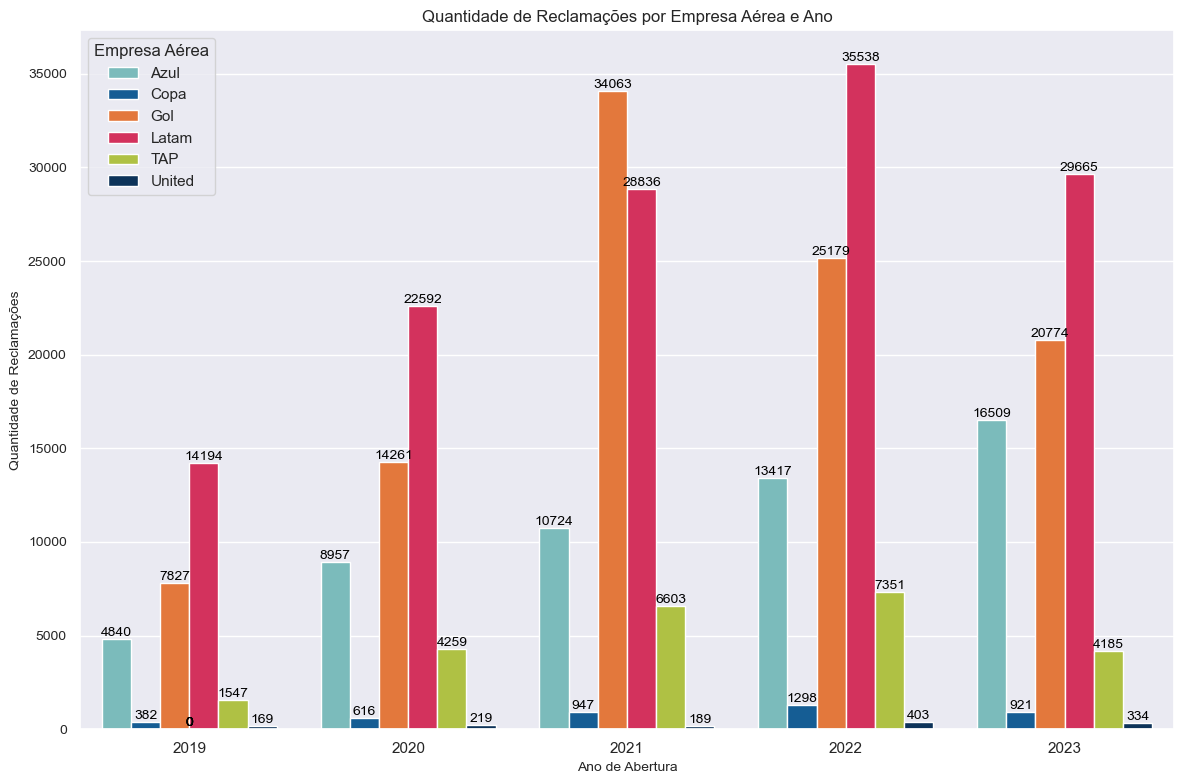

In [ ]:
# Agrupar as reclamacoes por Empresa e Ano de Abertura
reclamacoes_empresa_ano = dados_reclamacoes_final.groupby(['empresa_aerea', 'Ano Abertura']).size().reset_index(name='Quantidade')

# Definindo o dicionário de cores para as empresas
cores_empresas = {
    'Azul': '#70C6C6',
    'Copa': '#0060A9',
    'Gol': '#FF7020',
    'Latam': '#EE1750',
    'TAP': '#BED62F',
    'United': '#003366'
}

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Ano Abertura', y='Quantidade', hue='empresa_aerea', data=reclamacoes_empresa_ano, palette=cores_empresas)

# Título e rótulos dos eixos
plt.title('Quantidade de Reclamações por Empresa Aérea e Ano', fontsize=12)
plt.xlabel('Ano de Abertura', fontsize=10)
plt.ylabel('Quantidade de Reclamações', fontsize=10)
ax.legend(title='Empresa Aérea')

# Adicionar a quantidade de reclamações na parte superior das barras
for p in ax.patches:
    # Pega a altura da barra para posicionar o rótulo
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2  # Centraliza o texto na largura da barra
    y_position = height  # Posiciona o texto no topo da barra

    # Formatação do texto: quantidade de reclamações
    value_text = f'{height:.0f}'

    # Adiciona o rótulo com o número de reclamações na parte superior da barra
    ax.annotate(value_text,
                (x_position, y_position),
                ha='center', va='bottom',  # Alinha o texto no topo da barra
                fontsize=10, color='black')

# Ajustar o tamanho da fonte das categorias
plt.yticks(fontsize=10)

# Ajustar layout
plt.tight_layout()

# Salvar a figura em um arquivo
plt.savefig("qtd_reclamacoes_por_empresa_ano.png", format="png", dpi=300)

# Exibir o gráfico
plt.show()

In [ ]:
# Calcular o crescimento ano a ano por empresa
reclamacoes_empresa_ano['Crescimento Anual (%)'] = reclamacoes_empresa_ano.groupby('empresa_aerea')['Quantidade'].pct_change() * 100

# Exibindo o resultado
print("\nCrescimento Percentual por Empresa Aérea e Ano:")
print(reclamacoes_empresa_ano)


Crescimento Percentual por Empresa Aérea e Ano:
   empresa_aerea  Ano Abertura  Quantidade  Crescimento Anual (%)
0           Azul          2019        4840                    NaN
1           Azul          2020        8957              85.061983
2           Azul          2021       10724              19.727587
3           Azul          2022       13417              25.111899
4           Azul          2023       16509              23.045390
5           Copa          2019         382                    NaN
6           Copa          2020         616              61.256545
7           Copa          2021         947              53.733766
8           Copa          2022        1298              37.064414
9           Copa          2023         921             -29.044684
10           Gol          2019        7827                    NaN
11           Gol          2020       14261              82.202632
12           Gol          2021       34063             138.854218
13           Gol          2

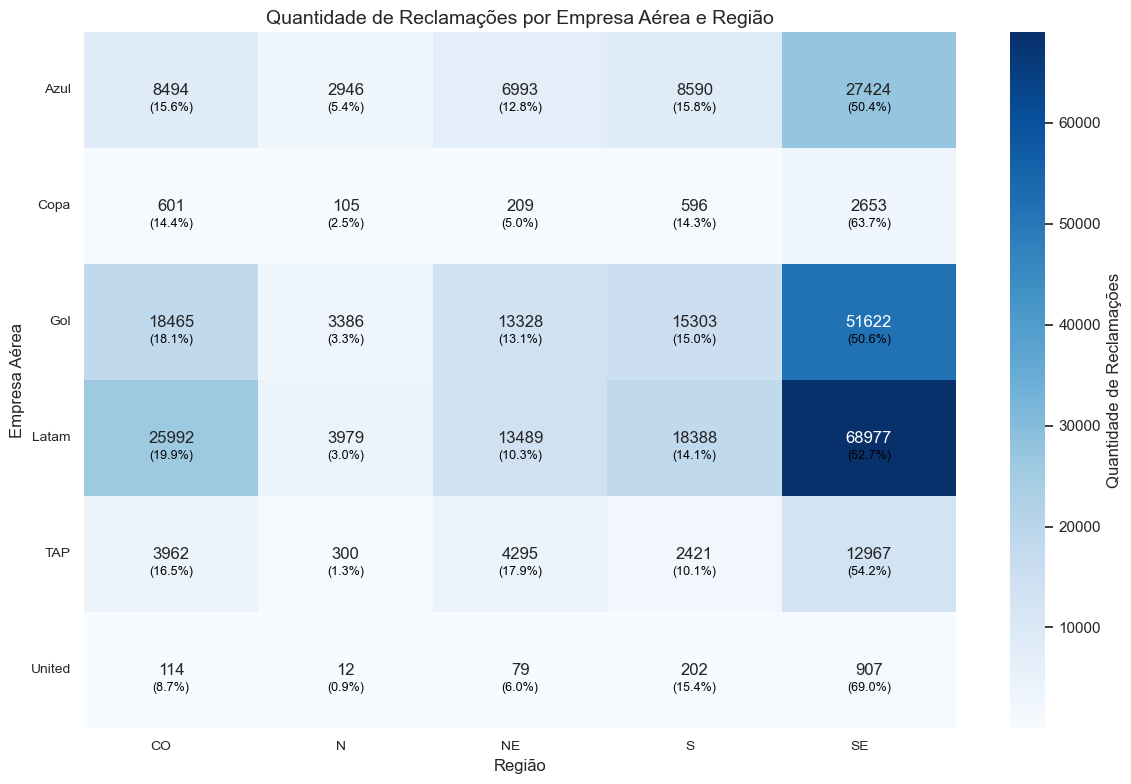

In [ ]:
# Agrupar as reclamações por Empresa e Região
reclamacoes_empresa_regiao = dados_reclamacoes_final.groupby(['empresa_aerea', 'Região']).size().reset_index(name='Quantidade')

# Criar uma tabela de contingência (pivot) com a quantidade de reclamações
tabela_contingencia = reclamacoes_empresa_regiao.pivot(index='empresa_aerea', columns='Região', values='Quantidade')

# Calcular o total de reclamações para cada empresa
totais_empresa = tabela_contingencia.sum(axis=1)

# Calcular o percentual de cada valor em relação ao total de reclamações da empresa
tabela_percentual = tabela_contingencia.div(totais_empresa, axis=0) * 100

# Criar o gráfico de mapa de calor
plt.figure(figsize=(12, 8))
ax = sns.heatmap(tabela_contingencia, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Quantidade de Reclamações'})

# Adicionar os percentuais abaixo dos valores absolutos
for (i, j), val in np.ndenumerate(tabela_contingencia.values):
    percentual = tabela_percentual.iloc[i, j]
    # Adicionando o percentual abaixo do valor absoluto (com ajuste de posição vertical)
    ax.text(j + 0.5, i + 0.65, f'({percentual:.1f}%)', ha='center', va='center', fontsize=9, color='black')

# Título do gráfico
plt.title('Quantidade de Reclamações por Empresa Aérea e Região', fontsize=14)

# Ajustar o tamanho da fonte dos rótulos
plt.xlabel('Região', fontsize=12)
plt.ylabel('Empresa Aérea', fontsize=12)
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Ajustar layout
plt.tight_layout()

# Salvar a figura em um arquivo
plt.savefig("qtd_reclamacoes_por_empresa_regiao.png", format="png", dpi=300)

# Exibir o gráfico
plt.show()

##### CÓDIGO CLASSIFICADOR ANAC E CATEGORIAS DE MOTIVOS

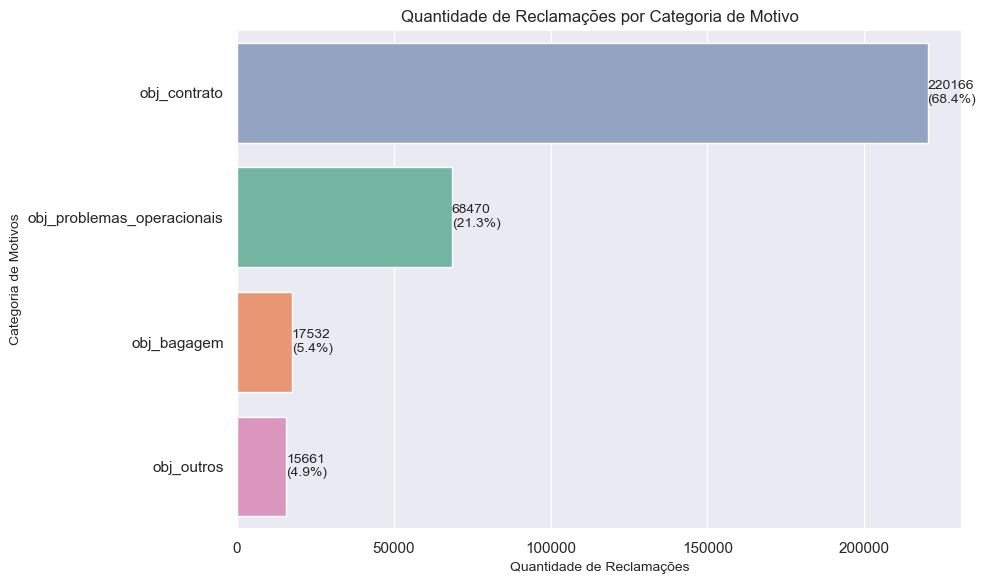

In [ ]:
# Definindo o dicionário de cores para os motivos
cores_motivos = {
    'obj_problemas_operacionais': '#66C2A5',
    'obj_bagagem': '#FC8D62',
    'obj_contrato': '#8DA0CB',
    'obj_outros': '#E78AC3',
}

# Contabilizar as ocorrências de 1 em cada uma das colunas de motivos
categorias_motivos = ['obj_problemas_operacionais', 'obj_bagagem', 'obj_contrato', 'obj_outros']

# Criar um novo DataFrame com as somas das ocorrências
reclamacoes_motivos = dados_reclamacoes_final[categorias_motivos].sum().reset_index()
reclamacoes_motivos.columns = ['Categoria', 'Quantidade de Reclamações']

# Ordenar o DataFrame pelas maiores quantidades
reclamacoes_motivos = reclamacoes_motivos.sort_values(by='Quantidade de Reclamações', ascending=False)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(data=reclamacoes_motivos, x='Quantidade de Reclamações', y='Categoria', hue='Categoria', palette=cores_motivos)

# Título e rótulos
plt.title('Quantidade de Reclamações por Categoria de Motivo', fontsize=12)
plt.xlabel('Quantidade de Reclamações', fontsize=10)
plt.ylabel('Categoria de Motivos', fontsize=10)

# Adicionando os números e percentuais ao lado de cada barra
total_reclamacoes_motivos = reclamacoes_motivos['Quantidade de Reclamações'].sum()
for p in plt.gca().patches:
    width = p.get_width()  # Agora é a largura, pois estamos usando barras horizontais
    percentage = (width / total_reclamacoes_motivos) * 100
    plt.gca().annotate(f'{int(width)}\n({percentage:.1f}%)',
                       (width, p.get_y() + p.get_height() / 2.),
                       ha='left', va='center', fontsize=10)

# Ajustar o layout para o gráfico
plt.tight_layout()

# Salvar a figura em um arquivo
plt.savefig("qtd_reclamacoes_por_motivos_com_percentual.png", format="png", dpi=300)

# Exibir o gráfico
plt.show()

In [ ]:
# Agrupar os dados por Ano Abertura e somar as ocorrências de cada categoria de motivo
reclamacoes_ano_motivo = dados_reclamacoes_final.groupby(['Ano Abertura'])[categorias_motivos].sum()

# Calcular o total de reclamações por Ano
reclamacoes_ano_motivo['Total'] = reclamacoes_ano_motivo.sum(axis=1)

# Calcular o percentual do total para cada categoria por Ano
for categoria in categorias_motivos:
    reclamacoes_ano_motivo[f'Percentual {categoria}'] = (reclamacoes_ano_motivo[categoria] / reclamacoes_ano_motivo['Total']) * 100

# Transpor o DataFrame para que as categorias fiquem nas linhas e os anos nas colunas
reclamacoes_ano_motivo_transposta = reclamacoes_ano_motivo.transpose()

# Exibir a tabela com o total de reclamações e os percentuais por categoria
reclamacoes_ano_motivo_transposta

Ano Abertura,2019,2020,2021,2022,2023
obj_problemas_operacionais,9544.000000,9870.000000,12097.000000,15359.000000,21600.000000
obj_bagagem,2710.000000,1447.000000,2078.000000,5026.000000,6271.000000
obj_contrato,16241.000000,38378.000000,64903.000000,60023.000000,40621.000000
obj_outros,988.000000,1891.000000,3767.000000,4483.000000,4532.000000
Total,29483.000000,51586.000000,82845.000000,84891.000000,73024.000000
Percentual obj_problemas_operacionais,32.371197,19.133098,14.601968,18.092613,29.579316
Percentual obj_bagagem,9.191738,2.805025,2.508299,5.920533,8.587588
Percentual obj_contrato,55.085982,74.396154,78.342688,70.705964,55.626917
Percentual obj_outros,3.351084,3.665723,4.547046,5.280890,6.206179


In [ ]:
# Agrupar os dados por Região e somar as ocorrências de cada categoria de motivo
reclamacoes_regiao_motivo = dados_reclamacoes_final.groupby(['Região'])[categorias_motivos].sum()

# Calcular o total de reclamações por Região
reclamacoes_regiao_motivo['Total'] = reclamacoes_regiao_motivo.sum(axis=1)

# Calcular o percentual do total para cada categoria por Região
for categoria in categorias_motivos:
    reclamacoes_regiao_motivo[f'Percentual {categoria}'] = (reclamacoes_regiao_motivo[categoria] / reclamacoes_regiao_motivo['Total']) * 100

# Transpor o DataFrame para que as categorias fiquem nas linhas e as regiões nas colunas
reclamacoes_regiao_motivo_transposta = reclamacoes_regiao_motivo.transpose()

# Exibir a tabela com o total de reclamações e os percentuais por categoria
reclamacoes_regiao_motivo_transposta

Região,CO,N,NE,S,SE
obj_problemas_operacionais,11091.000000,2707.000000,7768.000000,10853.000000,36051.000000
obj_bagagem,2679.000000,620.000000,2060.000000,2654.000000,9519.000000
obj_contrato,41894.000000,6993.000000,27312.000000,30353.000000,113614.000000
obj_outros,2765.000000,536.000000,1940.000000,2251.000000,8169.000000
Total,58429.000000,10856.000000,39080.000000,46111.000000,167353.000000
Percentual obj_problemas_operacionais,18.982012,24.935520,19.877175,23.536683,21.541890
Percentual obj_bagagem,4.585052,5.711127,5.271238,5.755677,5.687977
Percentual obj_contrato,71.700697,64.415991,69.887410,65.825942,67.888834
Percentual obj_outros,4.732239,4.937362,4.964176,4.881699,4.881299


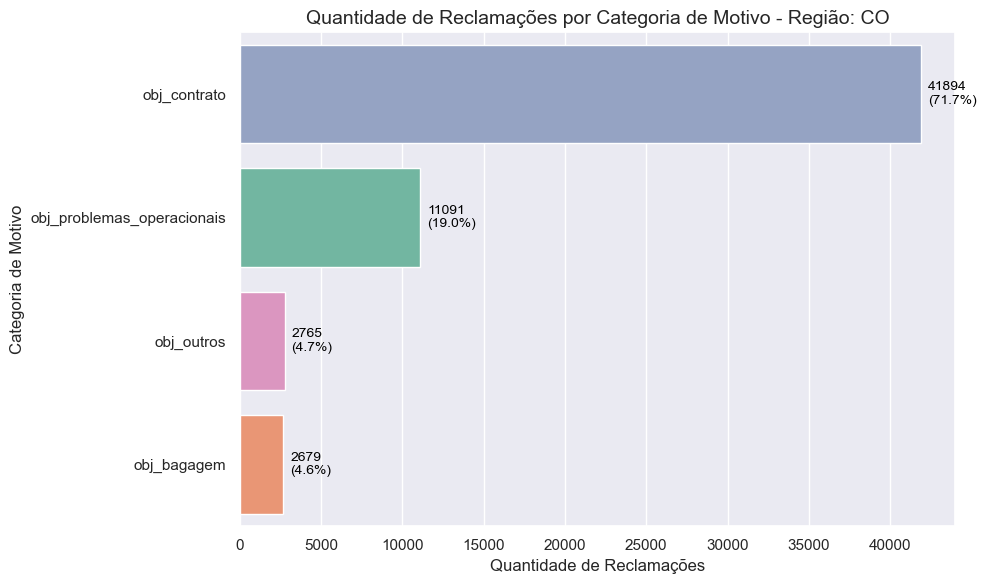

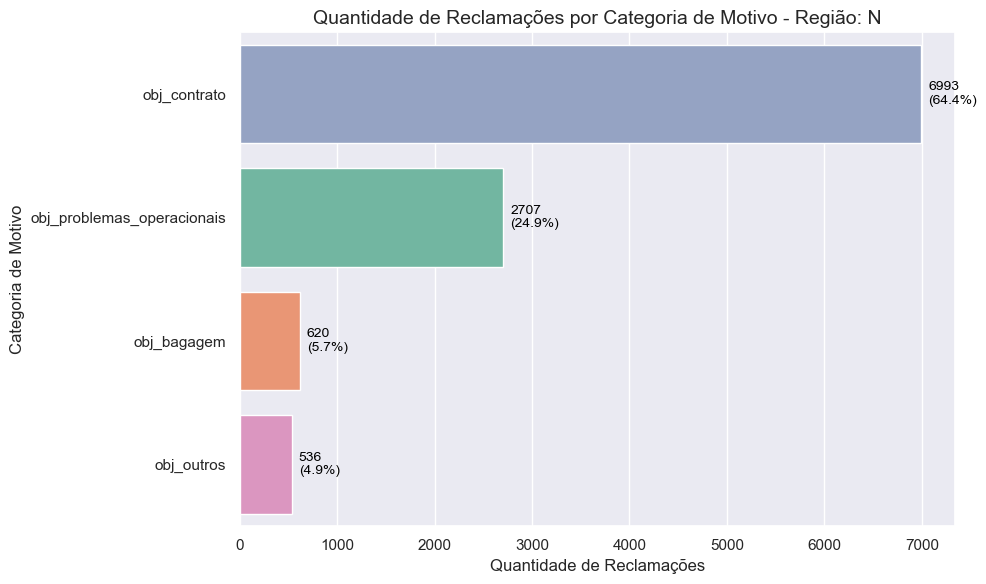

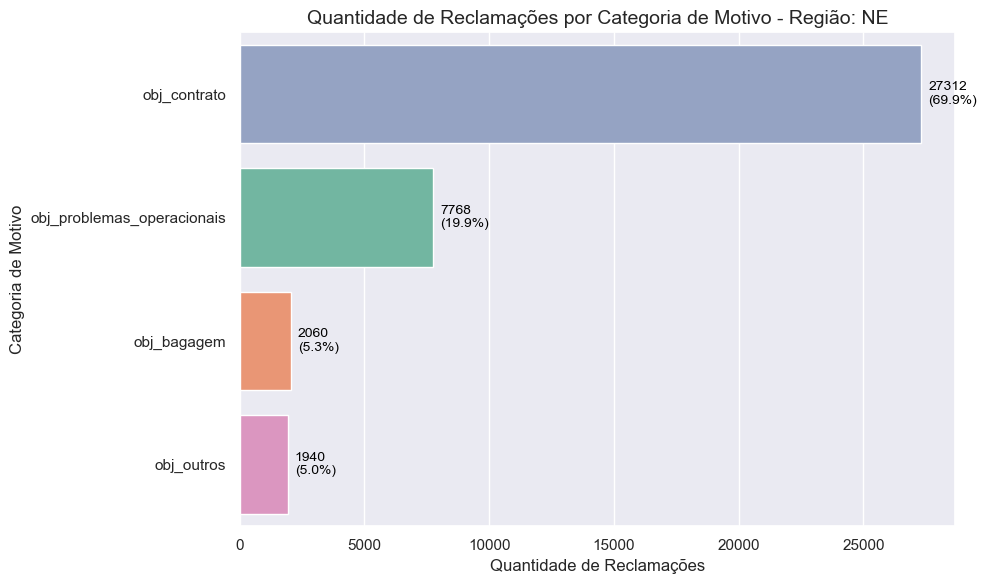

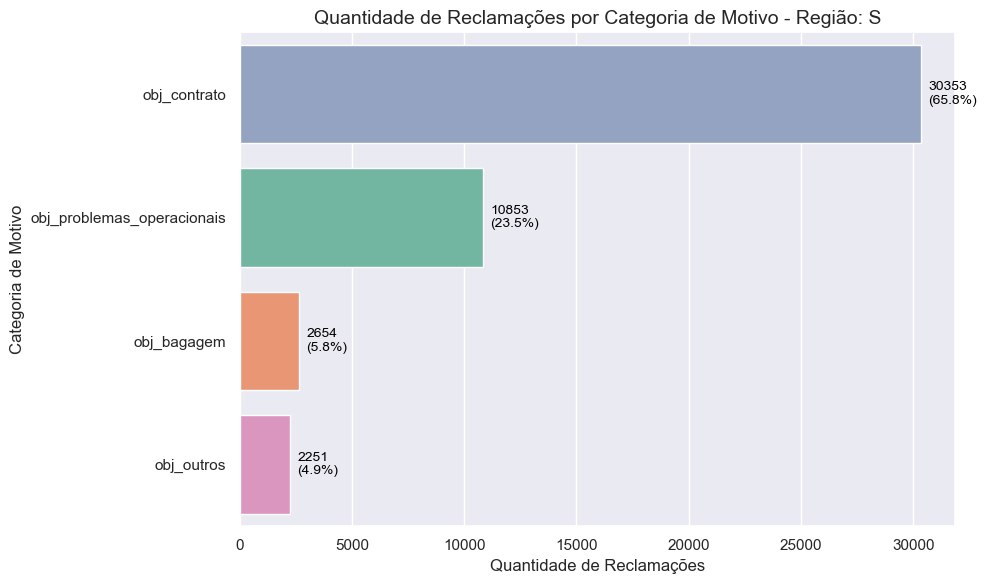

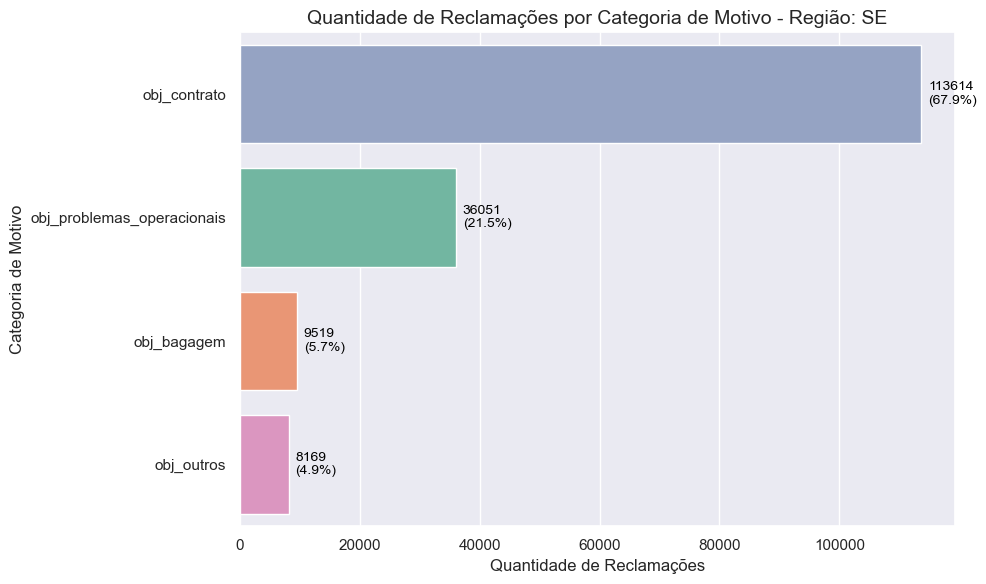

In [ ]:
# Definindo o dicionário de cores para os motivos
cores_motivos = {
    'obj_problemas_operacionais': '#66C2A5',
    'obj_bagagem': '#FC8D62',
    'obj_contrato': '#8DA0CB',
    'obj_outros': '#E78AC3',
}

# Agrupar os dados por Região e somar as ocorrências de cada categoria de motivo
reclamacoes_regiao_motivo = dados_reclamacoes_final.groupby(['Região'])[categorias_motivos].sum()

# Calcular o total de reclamações por Região
reclamacoes_regiao_motivo['Total'] = reclamacoes_regiao_motivo.sum(axis=1)

# Criar um gráfico para cada região
for regiao in reclamacoes_regiao_motivo.index:
    # Selecionar os dados da região
    dados_regiao = reclamacoes_regiao_motivo.loc[regiao, categorias_motivos]

    # Ordenar os dados da região do maior para o menor
    dados_regiao = dados_regiao.sort_values(ascending=False)  # Ordem decrescente para barras do maior para o menor

    # Plotar o gráfico de barras horizontais
    plt.figure(figsize=(10, 6))
    sns.barplot(x=dados_regiao.values, y=dados_regiao.index, palette=cores_motivos, orient='h', hue=dados_regiao.index)

    # Título e rótulos
    plt.title(f'Quantidade de Reclamações por Categoria de Motivo - Região: {regiao}', fontsize=14)
    plt.xlabel('Quantidade de Reclamações', fontsize=12)
    plt.ylabel('Categoria de Motivo', fontsize=12)

    # Calcular o total de reclamações para a região
    total_reclamacoes_regiao = dados_regiao.sum()

    # Adicionar os valores e percentuais nas barras
    for p in plt.gca().patches:
        width = p.get_width()  # Agora é a largura, pois estamos usando barras horizontais
        percentage = (width / total_reclamacoes_regiao) * 100
        plt.gca().annotate(f'{int(width)}\n({percentage:.1f}%)',
                           (width, p.get_y() + p.get_height() / 2.),
                           ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

    # Ajustar o layout para o gráfico
    plt.tight_layout()

    # Salvar o gráfico em formato PNG
    plt.savefig(f"reclamacoes_regiao_{regiao}.png", format="png", dpi=300)

    # Exibir o gráfico
    plt.show()

In [ ]:
# Agrupar os dados por empresa_aerea e somar as ocorrências de cada categoria de motivo
reclamacoes_empresa_motivo = dados_reclamacoes_final.groupby(['empresa_aerea'])[categorias_motivos].sum()

# Calcular o total de reclamações por empresa_aerea
reclamacoes_empresa_motivo['Total'] = reclamacoes_empresa_motivo.sum(axis=1)

# Calcular o percentual do total para cada categoria por empresa_aerea
for categoria in categorias_motivos:
    reclamacoes_empresa_motivo[f'Percentual {categoria}'] = (reclamacoes_empresa_motivo[categoria] / reclamacoes_empresa_motivo['Total']) * 100

# Transpor o DataFrame para que as categorias fiquem nas linhas e as empresas nas colunas
reclamacoes_empresa_motivo_transposta = reclamacoes_empresa_motivo.transpose()

# Exibir a tabela com o total de reclamações e os percentuais por categoria
reclamacoes_empresa_motivo_transposta

empresa_aerea,Azul,Copa,Gol,Latam,TAP,United
obj_problemas_operacionais,19752.000000,1045.000000,25273.000000,18967.000000,3062.000000,371.000000
obj_bagagem,4581.000000,701.000000,3608.000000,6945.000000,1473.000000,224.000000
obj_contrato,28455.000000,2513.000000,66103.000000,102168.000000,20227.000000,700.000000
obj_outros,2444.000000,86.000000,7828.000000,3485.000000,1789.000000,29.000000
Total,55232.000000,4345.000000,102812.000000,131565.000000,26551.000000,1324.000000
Percentual obj_problemas_operacionais,35.761877,24.050633,24.581761,14.416448,11.532522,28.021148
Percentual obj_bagagem,8.294105,16.133487,3.509318,5.278760,5.547814,16.918429
Percentual obj_contrato,51.519047,57.836594,64.295024,77.655912,76.181688,52.870091
Percentual obj_outros,4.424971,1.979287,7.613897,2.648881,6.737976,2.190332


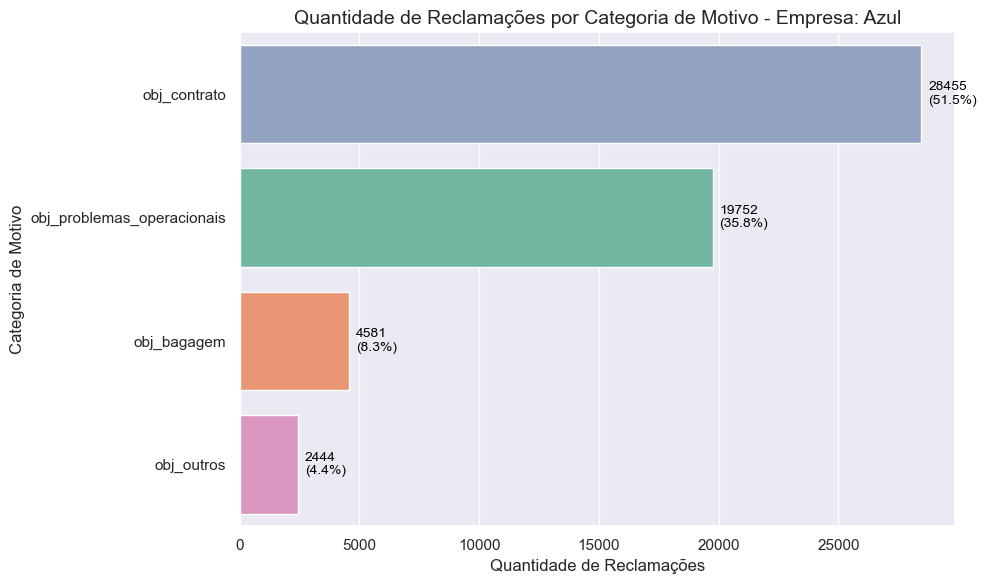

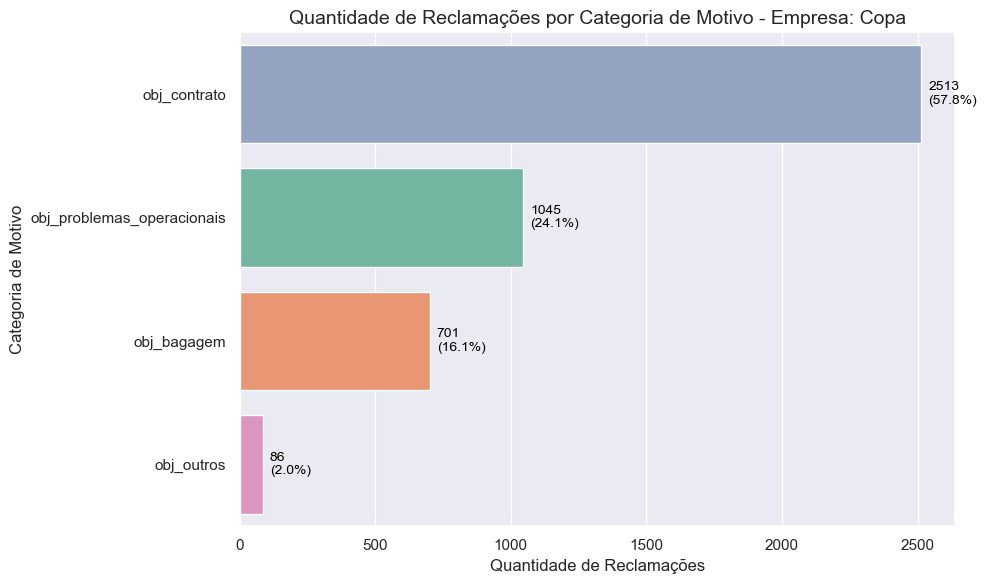

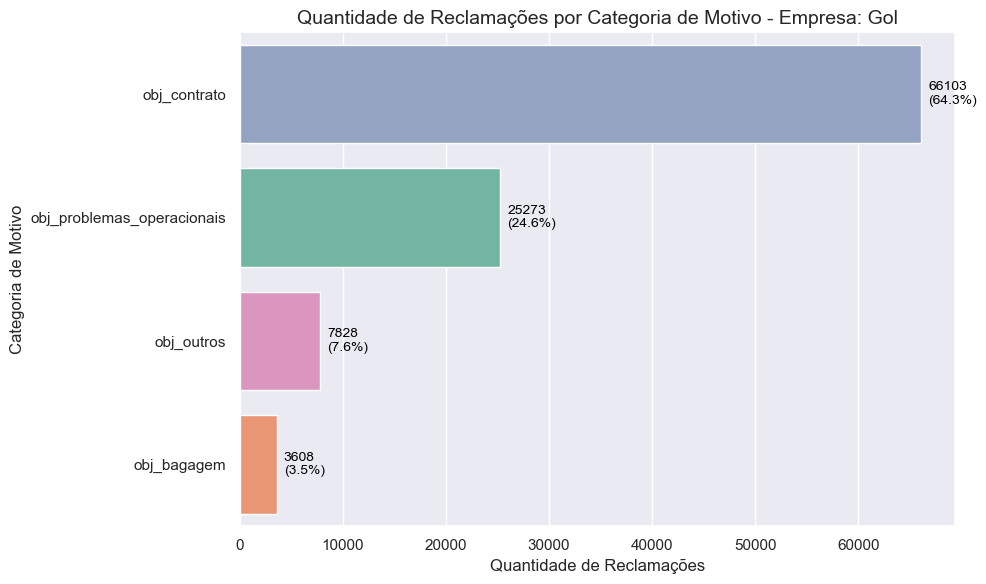

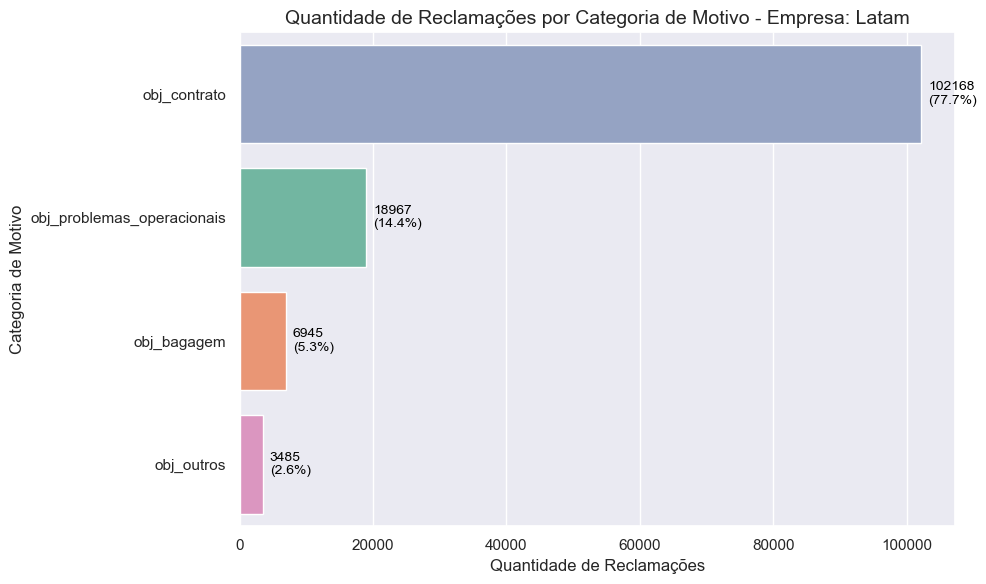

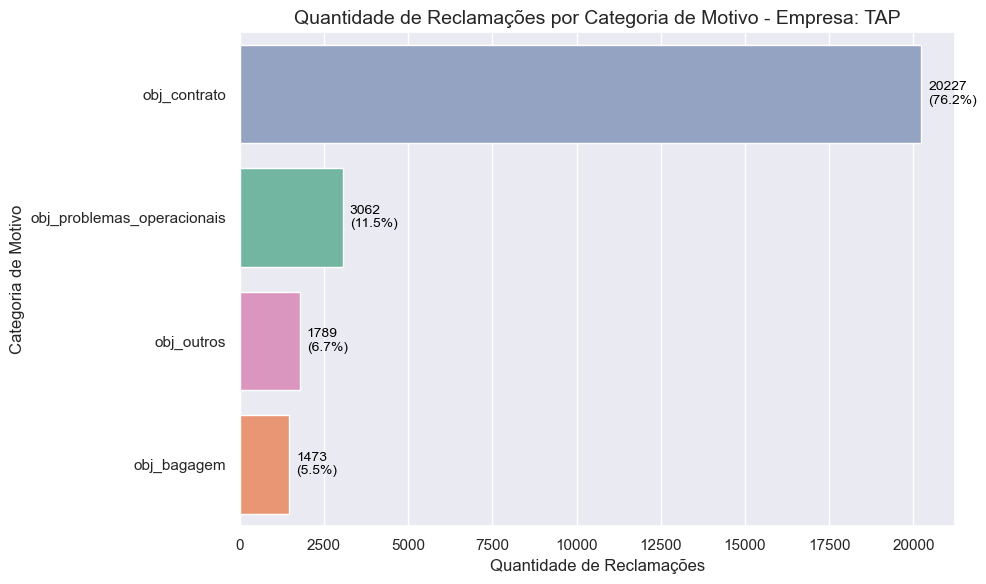

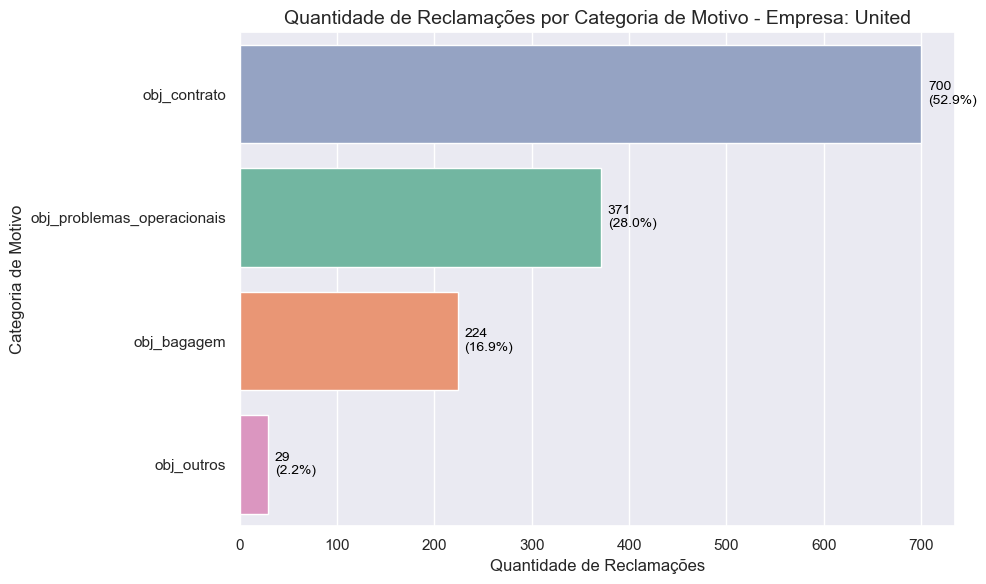

In [ ]:
# Definindo o dicionário de cores para os motivos
cores_motivos = {
    'obj_problemas_operacionais': '#66C2A5',
    'obj_bagagem': '#FC8D62',
    'obj_contrato': '#8DA0CB',
    'obj_outros': '#E78AC3',
}

# Agrupar os dados por Empresa e somar as ocorrências de cada categoria de motivo
reclamacoes_empresa_motivo = dados_reclamacoes_final.groupby(['empresa_aerea'])[categorias_motivos].sum()

# Calcular o total de reclamações por Empresa
reclamacoes_empresa_motivo['Total'] = reclamacoes_empresa_motivo.sum(axis=1)

# Criar um gráfico para cada empresa
for empresa in reclamacoes_empresa_motivo.index:
    # Selecionar os dados da empresa
    dados_empresa = reclamacoes_empresa_motivo.loc[empresa, categorias_motivos]

    # Ordenar os dados da empresa do maior para o menor
    dados_empresa = dados_empresa.sort_values(ascending=False)  # Ordem decrescente para barras do maior para o menor

    # Plotar o gráfico de barras horizontais
    plt.figure(figsize=(10, 6))
    sns.barplot(x=dados_empresa.values, y=dados_empresa.index, hue=dados_empresa.index, palette=cores_motivos, legend=False)

    # Título e rótulos
    plt.title(f'Quantidade de Reclamações por Categoria de Motivo - Empresa: {empresa}', fontsize=14)
    plt.xlabel('Quantidade de Reclamações', fontsize=12)
    plt.ylabel('Categoria de Motivo', fontsize=12)

    # Calcular o total de reclamações para a empresa
    total_reclamacoes_empresa = dados_empresa.sum()

    # Adicionar os valores e percentuais nas barras
    for p in plt.gca().patches:
        width = p.get_width()  # Agora é a largura, pois estamos usando barras horizontais
        percentage = (width / total_reclamacoes_empresa) * 100
        plt.gca().annotate(f'{int(width)}\n({percentage:.1f}%)',
                           (width, p.get_y() + p.get_height() / 2.),
                           ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

    # Ajustar o layout para o gráfico
    plt.tight_layout()

    # Salvar a figura em um arquivo PNG com o nome da empresa
    plt.savefig(f"reclamacoes_empresa_{empresa}.png", format="png", dpi=300)

    # Exibir o gráfico
    plt.show()

In [ ]:
# Carregar o arquivo Excel com as descrições dos códigos ANAC
df_descricoes = pd.read_excel(excel_file)

# Garantir que a coluna 'codigo_anac' seja do tipo string (str)
df_descricoes['codigo_anac'] = df_descricoes['codigo_anac'].astype(str)

# Completar os códigos com 4 dígitos, preenchendo com 0 à esquerda
df_descricoes['codigo_anac'] = df_descricoes['codigo_anac'].str.zfill(4)

# Agrupar as reclamações por 'Ano Abertura' e 'codigo_anac' para contar o número de reclamações por código ANAC por ano
reclamacoes_ano_codigo = dados_reclamacoes_final.groupby(['Ano Abertura', 'codigo_anac']).size().reset_index(name='Quantidade de Reclamações')

# Calcular os percentuais por ano
total_reclamacoes_por_ano = reclamacoes_ano_codigo.groupby('Ano Abertura')['Quantidade de Reclamações'].transform('sum')
reclamacoes_ano_codigo['Percentual (%)'] = (reclamacoes_ano_codigo['Quantidade de Reclamações'] / total_reclamacoes_por_ano) * 100

# Realizar a junção (merge) entre as tabelas usando 'codigo_anac' e 'codigo_anac'
reclamacoes_ano_codigo_merge = pd.merge(reclamacoes_ano_codigo, df_descricoes, left_on='codigo_anac', right_on='codigo_anac', how='left')

# Renomear a coluna 'codigo_anac' para 'Código ANAC' para evitar confusão
reclamacoes_ano_codigo_merge.rename(columns={'codigo_anac': 'Código ANAC'}, inplace=True)

# Selecionar o top 5 por ano
top_5_por_ano = []
for ano in reclamacoes_ano_codigo_merge['Ano Abertura'].unique():
    top_5_ano = reclamacoes_ano_codigo_merge[reclamacoes_ano_codigo_merge['Ano Abertura'] == ano] \
                    .sort_values(by='Quantidade de Reclamações', ascending=False) \
                    .head(5)
    top_5_por_ano.append(top_5_ano)

# Concatenar todos os top 5 por ano em um único DataFrame
top_5_df = pd.concat(top_5_por_ano)

# Salvar o DataFrame top_5_df em um arquivo Excel
top_5_df.to_excel('top_5_reclamacoes_por_ano.xlsx', index=False)

# Exibir o resultado final
top_5_df

,Ano Abertura,Código ANAC,Quantidade de Reclamações,Percentual (%),Tema,Subtema,Assunto,PROBLEMAS OPERACIONAIS,BAGAGEM,CONTRATO,OUTROS
379,2019,1400,2482,8.570738,Alteração pelo passageiro,Multas contratuais,NaN,0.0,0.0,1.0,0.0
575,2019,2225,2380,8.218516,Alteração pela empresa aérea,"Alternativas em alterações ou cancelamentos programados (reacomodação, reembolso integral ou outra modalidade de transporte)",Discorda das alternativas de reacomodação,1.0,0.0,0.0,0.0
1486,2019,8000,1638,5.656273,Programas de fidelidade,NaN,NaN,0.0,0.0,1.0,0.0
4,2019,0110,1361,4.699748,Oferta e compra,Informações durante a compra da passagem,"Regras e multas para no-show, cancelamento, remarcação e reembolso",0.0,0.0,1.0,0.0
861,2019,3325,1282,4.426948,Execução do voo,"Alternativas em atrasos, cancelamentos, interrupção do serviço ou preterição (reacomodação, reembolso integral ou outra modalidade de transporte)",Discorda das alternativas de reacomodação,1.0,0.0,0.0,0.0
1933,2020,1400,9069,17.815889,Alteração pelo passageiro,Multas contratuais,NaN,0.0,0.0,1.0,0.0
1599,2020,0110,5714,11.225051,Oferta e compra,Informações durante a compra da passagem,"Regras e multas para no-show, cancelamento, remarcação e reembolso",0.0,0.0,1.0,0.0
2307,2020,2225,4358,8.561213,Alteração pela empresa aérea,"Alternativas em alterações ou cancelamentos programados (reacomodação, reembolso integral ou outra modalidade de transporte)",Discorda das alternativas de reacomodação,1.0,0.0,0.0,0.0
2718,2020,5300,3553,6.979805,Reembolso,Prazo de reembolso,NaN,0.0,0.0,1.0,0.0
2612,2020,5105,2744,5.390539,Reembolso,Valor do reembolso,Reembolso decorrente de alteração da passagem pelo passageiro,0.0,0.0,1.0,0.0
